# Basic statistical methods walk-through with examples

Keywords: central tendency, variance, normal distribution, z-test, t-test, correlation, regression, χ2-test, f-test, paradox

## Objective

In this document I walk through basic statistical methods, more or less discussed in depth. The purpose is neither to explain theoretical principles of statistics nor to come to a single finite solution for a single problem. Rather I express thoughts loudly, I fill gaps where I see a lack of information available and, most of all, I learn for myself how to use Python's available set of libraries for data analysis. The notebook does not follow strict IF-THEN reasoning about data and sometimes I add some information just to demonstrate a statistical method better.

## Let's get started

In [1]:
from itertools import combinations

from hypothesis_testing import reject

Import necessary python libraries for working with data, statistics and ML

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

import numpy as np
import pandas as pd

from scipy import stats as st

from sklearn.utils import shuffle
from sklearn import linear_model, model_selection

Load datasets

In [3]:
reds = pd.read_csv('./data/wineQualityReds.csv', index_col=0)
whites = pd.read_csv('./data/wineQualityWhites.csv', index_col=0)

Description of the data can be found [here](https://github.com/ludgo/udaWine/blob/master/data/Redirecting.txt). We are particularly interested in column descriptions:

Input variables (based on physicochemical tests):
   1. fixed acidity (tartaric acid - g / dm^3)
   2. volatile acidity (acetic acid - g / dm^3)
   3. citric acid (g / dm^3)
   4. residual sugar (g / dm^3)
   5. chlorides (sodium chloride - g / dm^3
   6. free sulfur dioxide (mg / dm^3)
   7. total sulfur dioxide (mg / dm^3)
   8. density (g / cm^3)
   9. pH
   10. sulphates (potassium sulphate - g / dm3)
   11. alcohol (% by volume)
   
Output variable (based on sensory data): 
   12. quality (score between 0 and 10)

To get intuition about data available, we should look at some examples

In [4]:
print('Red wines')
print(reds.head())
print()
print('White wines')
print(whites.head())

Red wines
   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
1            7.4              0.70         0.00             1.9      0.076   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968  3.20       0.68   
3                 15.0                  54.0   0.9970  3.26       0.65   
4                 17.0                  60.0   0.9980  3.16       0.58   
5                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
1      9.4        5  
2      9.8        5  
3      9.8

We possess information that both datasets are polished and contain same parameters. That's why we can also join them. Note that the number of white wines is disproportional to the number of red wines

In [5]:
wines = pd.concat([reds,whites], ignore_index=True)
print(wines.head())
wines.to_csv('./data/wineQuality.csv')

   fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free.sulfur.dioxide  total.sulfur.dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

## Basic statistics

We choose the quality column of integers. Then we can perform basic statistical operations

In [6]:
print('All wines')
print(wines.describe())

All wines
       fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free.sulfur.dioxide  total.sulfur.dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.00000

In [7]:
quality = wines['quality'].copy().reset_index(drop=True)

print('Wine quality')
print()

minimum = quality.min()
print('Worst wine (minimum): {}'.format(minimum))

maximum = quality.max()
print('Best wine (maximum): {}'.format(maximum))

mean = quality.mean()
print('Average wine (mean): {}'.format(mean))

median = quality.median()
print('Middle wine (median): {}'.format(median))

mode = quality.mode()
print('Most frequent wine (mode): {}'.format(mode.values))

Wine quality

Worst wine (minimum): 3
Best wine (maximum): 9
Average wine (mean): 5.818377712790519
Middle wine (median): 6.0
Most frequent wine (mode): [6]


We could continue, looking at concrete quartiles etc. ... However there is a built-in pandas' function to help us

## Normal distribution

Next we refer to wines as if they were collected at a single wine competition. Following part works with white wines only.

We have already seen an example of sample standard deviation before. Now we continue with density

In [8]:
density = shuffle(whites['density'].copy()).reset_index(drop=True)

std = density.std()
print('Sample standard deviation: {}'.format(std))
print('Degrees of freedom: n - 1')

Sample standard deviation: 0.0029909069169369385
Degrees of freedom: n - 1


Imagine that the wines taking part at the competition would be all existing wines in the world. Thus they would be the entire population and we could calculate population standard deviation. We do not apply [Bessel's correction](https://en.wikipedia.org/wiki/Bessel's_correction) thereby the value is smaller

In [9]:
popstd = density.std(ddof=0)
print('Population standard deviation: {}'.format(popstd))
print('Degrees of freedom: n')

Population standard deviation: 0.0029906015821480328
Degrees of freedom: n


This is certainly not necessarily true because we know that we did not collected all wines from all over the world. As often, visualization might be helpful. We have about 4900 white wines so that **sqrt(number_of_measurements)** = appr. 69 will be number of bins. But wait, is this really what statisticians do? To be more precise, we use rather [Freedman–Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)

(array([   9.,    5.,   23.,   66.,  155.,  164.,  242.,  272.,  293.,
         331.,  290.,  342.,  264.,  280.,  284.,  237.,  318.,  182.,
         182.,  162.,  187.,  236.,  117.,   86.,   76.,   61.,   13.,
          10.,    4.,    2.,    2.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.]),
 array([ 0.98711   ,  0.98762356,  0.98813713,  0.98865069,  0.98916426,
         0.98967782,  0.99019139,  0.99070495,  0.99121851,  0.99173208,
         0.99224564,  0.99275921,  0.99327277,  0

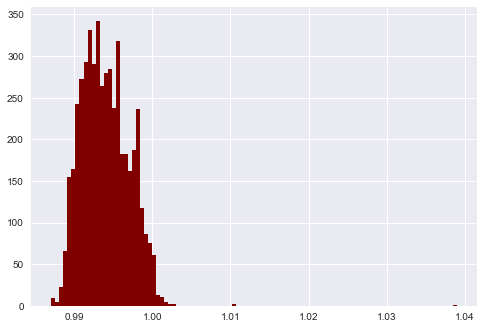

In [10]:
plt.hist(density, bins='fd', color='maroon')

For simplicity we remove outliers

(array([  78.,  154.,  187.,  224.,  271.,  298.,  318.,  284.,  351.,
         293.,  241.,  273.,  237.,  315.,  184.,  178.,  162.,  186.,
         204.,  145.,   82.,   81.,   56.]),
 array([ 0.98876   ,  0.98926478,  0.98976957,  0.99027435,  0.99077913,
         0.99128391,  0.9917887 ,  0.99229348,  0.99279826,  0.99330304,
         0.99380783,  0.99431261,  0.99481739,  0.99532217,  0.99582696,
         0.99633174,  0.99683652,  0.9973413 ,  0.99784609,  0.99835087,
         0.99885565,  0.99936043,  0.99986522,  1.00037   ]),
 <a list of 23 Patch objects>)

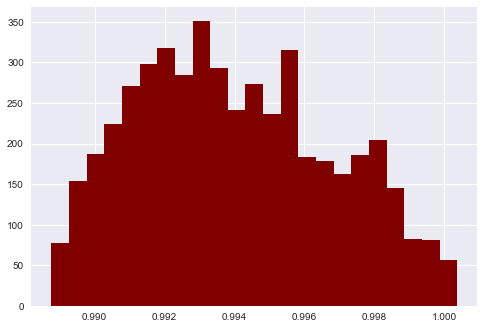

In [11]:
density = pd.Series(st.trimboth(density, proportiontocut=.01))

plt.hist(density, bins='fd', color='maroon')

It seems that the density may fall into normal distribution. It would be strange just to say it is a normally distributed variable though. Fortunately, we know Central Limit Theorem which tells us that if we take same-sized samples, their means approximate normal distribution whether the population itself is normal or skewed

(array([  4.,   3.,   7.,  18.,  17.,  23.,  19.,   9.]),
 array([ 0.99306375,  0.99325535,  0.99344695,  0.99363855,  0.99383016,
         0.99402176,  0.99421336,  0.99440496,  0.99459656]),
 <a list of 8 Patch objects>)

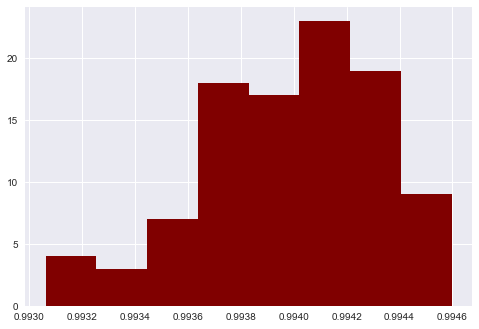

In [12]:
samples = []
samplesize = 64
nbins = int(samplesize**0.5)

for i in range(100):
    samples.append(density.sample(samplesize).mean())
samples = pd.Series(samples)
plt.hist(samples, bins=nbins, color='maroon')

We want to transform values to such a normal distribution that it has mean 0 and standard deviation 1. Initially, we need z-scores of the values. Z-score tells us how many standard deviations a value stands from the mean. We say we standardized the distribution. Plot is as follows

(array([ 0.0687636 ,  0.0515727 ,  0.12033631,  0.30943621,  0.29224531,
         0.39539072,  0.32662711,  0.15471811]),
 array([-2.77511863, -2.19341555, -1.61171246, -1.03000938, -0.44830629,
         0.13339679,  0.71509988,  1.29680296,  1.87850605]),
 <a list of 8 Patch objects>)

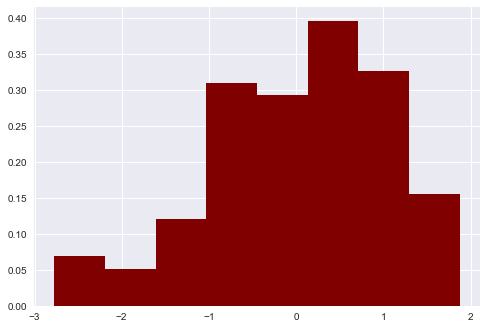

In [13]:
zscores = st.zscore(samples)
plt.hist(zscores, bins=nbins, normed=1, color='maroon')

Then population mean is same as sample mean

In [14]:
mean = samples.mean()
print(mean)

0.9939778195312503


... and population standard deviation can be obtained by next formula. We call sample standard deviation also standard error

In [15]:
standardError = samples.std()
popstd = standardError * len(samples)**0.5
print(popstd)

0.003310397017089314


Ok. Something different again. In case the density does really copy normal distribution, we can ask different questions

In [16]:
normDensity = st.zscore(density)

for i in [.8, .9, .95, .99]:
    print('How many white wines at competition are at world top {}% ?'.format(100-int(100*i)))
    zcritical = st.norm.ppf(i)
    print(len(normDensity[normDensity > zcritical]))

How many white wines at competition are at world top 20% ?
1093
How many white wines at competition are at world top 10% ?
675
How many white wines at competition are at world top 5% ?
305
How many white wines at competition are at world top 1% ?
0


## Z - test

In fact, dozens of competitions are held every wine season across many countries all over the world. From a huge amount of data, which can be considered to be the world wine population, imagine we know average competition white wine density is characterized by mean and standard deviation. An expert comes, points the numbers out and claims that the density at this competition was manipulated. He says somebody either poured water to increase wine density or added alcohol to decrease it, such that it influenced quality results.

We can carry out two-tailed hypothesis testing to check it out. Now we consider all competition data to be a sample. Null hypothesis states expert's mean and competition's mean are equal, alternative hypothesis not equal

In [17]:
popmean = .996
print('Population mean: {} -known-'.format(popmean))
popstd = .002
print('Population standard deviation: {} -known-'.format(popstd))
mean = density.mean()
print('Sample mean: {}'.format(mean))
std = density.std()
print('Sample standard deviation: {} (We do not need this.)'.format(std))

Population mean: 0.996 -known-
Population standard deviation: 0.002 -known-
Sample mean: 0.9940043221574336
Sample standard deviation: 0.002793556248393707 (We do not need this.)


Then we test at different alpha levels

In [18]:
zscore = (mean - popmean) / popstd
print('Z-score: {}'.format(zscore))

pvalue = 2*st.norm.sf(abs(zscore))
reject(pvalue)

Z-score: -0.9978389212831895
The probability of null hypothesis is 31.835747349422448% so we
do not reject null hypothesis at 95.0% confidence interval.
do not reject null hypothesis at 99.0% confidence interval.
do not reject null hypothesis at 99.5% confidence interval.


Seems that 'the expert' was not right at all. However, do we know for sure that he was 100% wrong. No. What if he was right and we would have rejected null hypothesis? We would just show that density at this competition was different from the usual one at chosen confidence interval. Another problem is that the change itself does not always imply manipulation. To get a bit more confused, we have even not proved that density influences somehow the quality of wine, so that competition could be manipulated in this way without influence on results. Statistics brings us quite often to a complicated decision process and there is almost always something more to consider and to double check own errors.

Here I will try to summarize types of z-tests:

- single value z-test:

We compare a concrete value to the corresponding population's parameter, namely for example mean, variance or proportion

- difference value z-test:

We compare a parameter between two populations, namely for example variance or proportion

## T - test

We continue with red wines, specifically how much alcohol they contain.

For purpose of this section we model only small competition with 20 wines participating in

In [19]:
alcohol = reds['alcohol'].copy().reset_index(drop=True)[:20]
print(alcohol)

0      9.4
1      9.8
2      9.8
3      9.8
4      9.4
5      9.4
6      9.4
7     10.0
8      9.5
9     10.5
10     9.2
11    10.5
12     9.9
13     9.1
14     9.2
15     9.2
16    10.5
17     9.3
18     9.0
19     9.2
Name: alcohol, dtype: float64


Next, we are going to react to the suggestion that the competition was manipulated by systematically adding alcohol to wines, assuming known population mean at similar competitions.

We perform one-tailed t-test. Null hypothesis states the percentage of alcohol is equal or less than at similar competitions, alternative hypothesis greater than

In [20]:
popmean = 9.8
print('Population mean: {} -known-'.format(popmean))
print('Population standard deviation: -unknown-')
mean = alcohol.mean()
print('Sample mean: {}'.format(mean))
std = alcohol.std()
print('Sample standard deviation: {}'.format(std))

Population mean: 9.8 -known-
Population standard deviation: -unknown-
Sample mean: 9.605
Sample standard deviation: 0.4762518130922803


Then we test at different alpha levels

In [21]:
#tscore = (mean - popmean) / std * len(alcohol)**0.5
tscore, twosided_pvalue = st.ttest_1samp(alcohol, popmean)
print('T-score: {}'.format(tscore))

pvalue = twosided_pvalue / 2
reject(pvalue)

T-score: -1.8311038136792233
The probability of null hypothesis is 4.14069212922548% so we
reject null hypothesis at 95.0% confidence interval.
do not reject null hypothesis at 99.0% confidence interval.
do not reject null hypothesis at 99.5% confidence interval.


Here I will try to summarize types of t-tests:

- ONE sample t-test:

We compare the mean of *single sample* to a concrete value (*n - 1* degrees of freedom)

- TWO sample t-test:

We compare the mean difference of two *independent samples* to a concrete value (*n1 + n2 - 1* degrees of freedom)

- PAIRED t-test: 

We compare the mean difference of two *dependent* or *paired samples* to a concrete value (*n - 1* degrees of freedom)

- CORRELATION t-test:

We compare *correlation coefficient* values to zero (*n - 2* degrees of freedom)

- REGRESSION t-test:

We compare *regression coefficient* values to zero

## Correlation

In this section we help our minds with processing all the difficulties in the way that we choose relationship of alcohol and density. Seeing density values and with basic information about ethanol density around 0.79 g / dm^3, a layman would say: "More alcohol wine contains, less dense it is." We continue with basic plotting

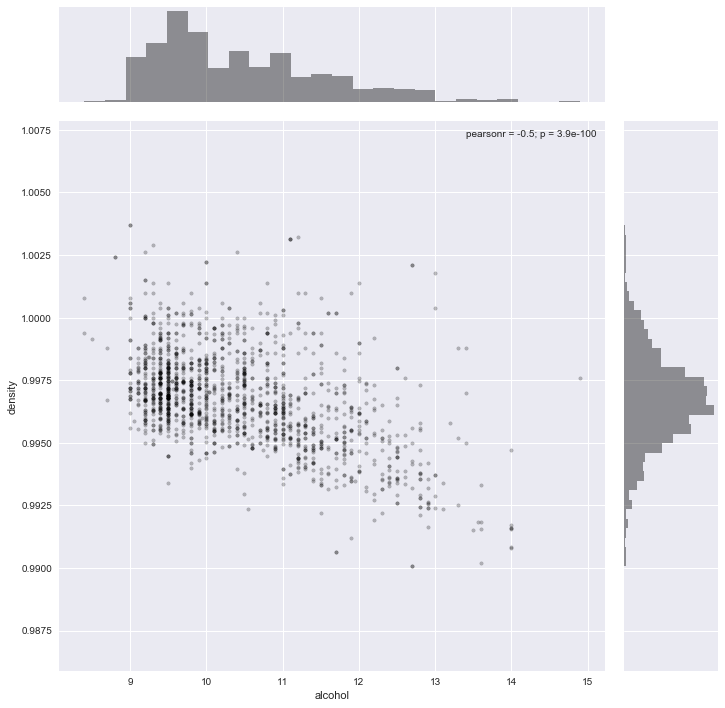

In [22]:
two = reds[['alcohol','density']].copy()

sns.jointplot(x='alcohol', y='density', data=two, size=10, alpha=.25, color='k', marker='.')

As always such rule of thumb reasoning is not what we exactly want even though it might be true at a glance. Maybe it is the best time to put some definitions in place, to find out what possibilities we have for correlation coefficient.

- Pearson's correlation coefficient:

Ratio of the covariance between two variables and the product of standard deviations is a common measure of linear dependency between variables

- Spearman's correlation coefficient:

A measure of monotonic dependency between variables, not necessarily linear, which belongs to so called rank correlations. Ranks approach correlation differently. For instance, it says if both variables are correlated at higher ranks etc. As we will see later, it tends to be more resistant to outliers. Ranks also make ideal Spearman however monotonic, thus non-parametric

- Kendall's tau:

Another rank correlation coefficient. In particular, it reflects a minimum number of neighbour swaps to switch between orderings

Here is an interesting [paper](http://geoinfo.amu.edu.pl/qg/archives/2011/QG302_087-093.pdf) on correlation coefficients from which we can conclude two statements:

1. Kendall gives similar performance to Spearman with slightly better results

2. Significant Spearman may imply significant or insignificant Pearson, not vice versa (logically since linearity is a subset of monotonicity)

So theoretically motivated we are prepared to calculate all of them. But first we plot the relationship also for ranks

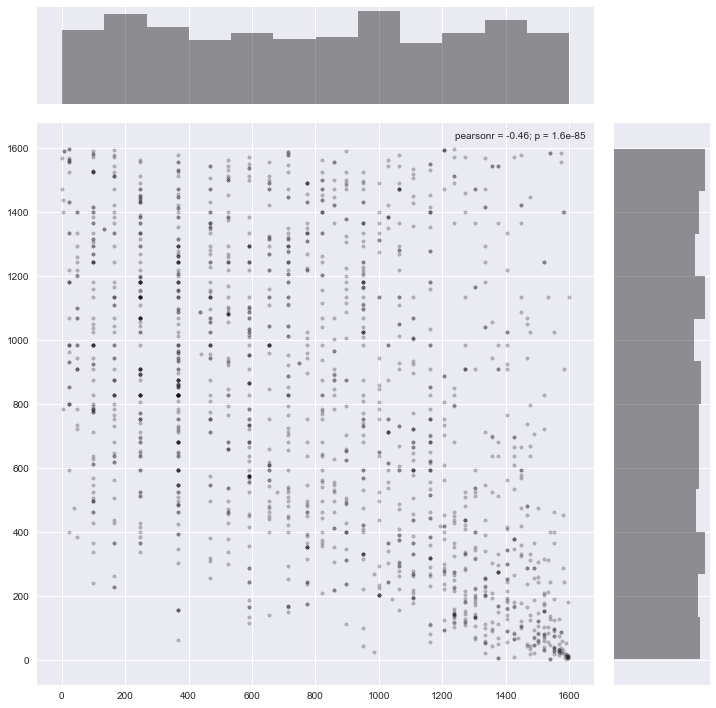

In [23]:
sns.jointplot(x=st.rankdata(two['alcohol']), y=st.rankdata(two['density']), size=10, alpha=.25, color='k', marker='.')

Two notes here. We see how ranking method reduced outliers visually (even though, to be honest, they were not so obvious before too). After seeing the second plot, linear dependency does not come out to be so clear at the first sight.

Finally, we calculate coefficients and proceed with t-test. Null hypothesis states variables are not correlated, alternative hypothesis correlated somehow

In [24]:
pearson_r, pearson_p = st.pearsonr(two['alcohol'], two['density'])
print("Pearson: {}".format(pearson_r))
reject(pearson_p)

print()

spearman_r, spearman_p = st.spearmanr(two['alcohol'], two['density'])
print("Spearman: {}".format(spearman_r))
reject(spearman_p)

print()

kendall_r, kendall_p = st.kendalltau(two['alcohol'], two['density'])
print("Kendall: {}".format(kendall_r))
reject(kendall_p)

Pearson: -0.4961797702417011
The probability of null hypothesis is 3.938835339991827e-98% so we
reject null hypothesis at 95.0% confidence interval.
reject null hypothesis at 99.0% confidence interval.
reject null hypothesis at 99.5% confidence interval.

Spearman: -0.46244457892711605
The probability of null hypothesis is 1.5597086534958758e-83% so we
reject null hypothesis at 95.0% confidence interval.
reject null hypothesis at 99.0% confidence interval.
reject null hypothesis at 99.5% confidence interval.

Kendall: -0.3297539626741849
The probability of null hypothesis is 6.924366145922608e-85% so we
reject null hypothesis at 95.0% confidence interval.
reject null hypothesis at 99.0% confidence interval.
reject null hypothesis at 99.5% confidence interval.


Huh. Everything indicates our two variables are really dependent. Spearman suggests that the dependency is monotonic, Pearson that even linear and negative sign of correlation coefficient negative relationship. Indeed, correlation seems to be evident, but variables still not extraordinarily tight. On the other hand, we obtained such results even without thinking about outliers which could have loosened the correlation easily. Besides remember, extremely low probability of null hypothesis does not indicate strong correlation, but refuses significantly that variables are not correlated at all

## Regression

Coming from correlation to regression visualisation, it would be pretty boring just to draw a line. Since linear regression is also one of the widely used techniques of machine learning (even by people who do not know what machine learning is), we are changing our object of interest now. We can rather run basic machine learning algorithm and draw a corresponding line for test set only. We simply divide data into train and test set by standard ratio 80:20 and visualize

Slope: [[-0.00086441]]
Intercept: [ 1.00576821]
Mean squared error: 2.508685875654146e-06
Variance score: 0.26281685960611756


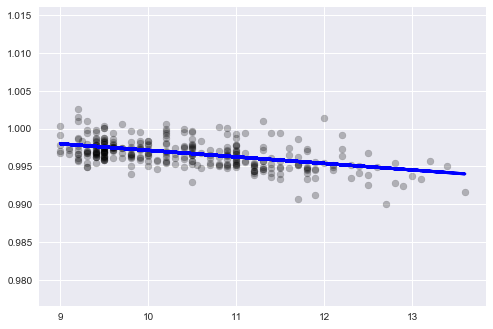

In [25]:
train_set, test_set = model_selection.train_test_split(two, test_size=.2)

X_train = train_set['alcohol'].values.reshape(len(train_set), 1)
X_test = test_set['alcohol'].values.reshape(len(test_set), 1)

y_train = train_set['density'].values.reshape(len(train_set), 1)
y_test = test_set['density'].values.reshape(len(test_set), 1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Slope: {}'.format(regr.coef_))
print('Intercept: {}'.format(regr.intercept_ ))
print('Mean squared error: {}'.format(np.mean((regr.predict(X_test) - y_test) ** 2)))
print('Variance score: {}'.format(regr.score(X_test, y_test)))

plt.scatter(X_test, y_test, color='black', alpha=.25)
plt.plot(X_test, regr.predict(X_test), color='blue', linewidth=3)

What both correlation and regression (speaking about linear regression) have in common is that they use Pearson. Note that by correlation we measure dependency between variables in general whereas by regression dependency of one variable on another

## χ2 - test

We model a smaller wine competition again, on which we are going to perform non-parametric testing. We are going to look specifically at the amount of citric acid in the volume. Null hypothesis states both red and white wines contain same proportion of the examined substance, alternative hypothesis different. We pretend some experts have said there is some low citric acid amount wine can contain and not being 

In [26]:
red_n = int(len(reds)/30)
white_n = int(len(whites)/30)
redCitric = reds['citric.acid'].copy().reset_index(drop=True)[:red_n]
whiteCitric = whites['citric.acid'].copy().reset_index(drop=True)[:white_n]

cond_val = .05

redPos = len( redCitric[ redCitric > cond_val ] )
redNeg = len( redCitric[ redCitric <= cond_val ] )
assert redPos + redNeg == len( redCitric )

whitePos = len( whiteCitric[ whiteCitric > cond_val ] )
whiteNeg = len( whiteCitric[ whiteCitric <= cond_val ] )
assert whitePos + whiteNeg == len( whiteCitric )

table_obs = pd.DataFrame({ 'red' : pd.Series([redPos, redNeg], index=['positive', 'negative']),
                    'white' : pd.Series([whitePos, whiteNeg], index=['positive', 'negative']) })

print('Contingency table for observed frequencies:')
print(table_obs)

Contingency table for observed frequencies:
          red  white
positive   38    157
negative   15      6


We use chi-square test for independence

In [27]:
chiscore, pvalue, df, expected = st.chi2_contingency(table_obs)

table_exp = pd.DataFrame(expected, columns=['red', 'white'], index=['positive', 'negative'])
print('Contingency table for expected frequencies:')
print(table_exp)

print()
print('Degrees of freedom: {}'.format(df))
print('Chi-score: {}'.format(chiscore))
reject(pvalue)

Contingency table for expected frequencies:
                red       white
positive  47.847222  147.152778
negative   5.152778   15.847222

Degrees of freedom: 1
Chi-score: 24.889089472860743
The probability of null hypothesis is 6.0725131276391435e-05% so we
reject null hypothesis at 95.0% confidence interval.
reject null hypothesis at 99.0% confidence interval.
reject null hypothesis at 99.5% confidence interval.


In conclusion we claim white wines do not contain as much citric acid as red wines. Note that table cells are filled with some numbers slightly greater than minimal required ones to run similar test. With even smaller numbers, test results would tend to be really strict either rejecting or not, but we would have doubts about relying on such tests.

Here I will try to summarize types of χ2-tests:

- Independence:

We check if two classification parameters of the population are independent

- Goodness of fit:

We check if the sample was selected from a population with a given distribution

- Homogeneity:

We check if more populations are homogeneous at a concrete parameter

## F - test

For those who suffer from nightmares only after thinking about [homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity), I am sorry. We are going to make one-way ANalysis Of VAriance done. For the first time we plan to use both red and white wines. White wines consist of more than two times more entries so that we build 3 samples of the red wines size. We pretend those are 3 independent samples. Null hypothesis states all 3 samples contain on average same amount of alcohol, alternative hypothesis they do not

In [28]:
n = len(reds)
sample1 = reds['alcohol'].copy()
print('Sample 1: size: {}, mean {}, variance: {}'.format(len(sample1), sample1.mean(), sample1.var()))
sample2 = whites['alcohol'][:n].copy()
print('Sample 2: size: {}, mean {}, variance: {}'.format(len(sample2), sample2.mean(), sample2.var()))
sample3 = whites['alcohol'][n:2*n].copy()
print('Sample 3: size: {}, mean {}, variance: {}'.format(len(sample3), sample3.mean(), sample3.var()))

Sample 1: size: 1599, mean 10.422983114446502, variance: 1.1356473950004693
Sample 2: size: 1599, mean 10.285240775484679, variance: 1.2632989250947537
Sample 3: size: 1599, mean 10.383614759224491, variance: 1.3654134585054352


We see how sample sizes and variances are approximately same. Therefore we can continue

In [29]:
fscore, pvalue = st.f_oneway(sample1, sample2, sample3)

print('F-score: {}'.format(fscore))
reject(pvalue)

F-score: 6.414133956372371
The probability of null hypothesis is 0.1652332352325724% so we
reject null hypothesis at 95.0% confidence interval.
reject null hypothesis at 99.0% confidence interval.
reject null hypothesis at 99.5% confidence interval.


Although rejecting null hypotheses usually confirms what we 'want' to possibly show, it does not tell us much in this case. We have to run two-tailed t-tests for all pairs of samples to find out which one differs significantly

In [30]:
dic = {'1':sample1, '2':sample2, '3':sample3}

for c in combinations(dic.keys(), 2):
    
    first, second = dic[c[0]], dic[c[1]]
    
    tscore, pvalue = st.ttest_ind(first, second)
    print('T-score for sample number {} and {}: '.format(c[0], c[1], tscore))
    reject(pvalue)
    
    print()

T-score for sample number 1 and 2: 
The probability of null hypothesis is 0.038177338153704644% so we
reject null hypothesis at 95.0% confidence interval.
reject null hypothesis at 99.0% confidence interval.
reject null hypothesis at 99.5% confidence interval.

T-score for sample number 1 and 3: 
The probability of null hypothesis is 31.960403796430313% so we
do not reject null hypothesis at 95.0% confidence interval.
do not reject null hypothesis at 99.0% confidence interval.
do not reject null hypothesis at 99.5% confidence interval.

T-score for sample number 2 and 3: 
The probability of null hypothesis is 1.531134885651321% so we
reject null hypothesis at 95.0% confidence interval.
do not reject null hypothesis at 99.0% confidence interval.
do not reject null hypothesis at 99.5% confidence interval.



The aim here was not to interpret results. But at least I mention that the difference in alcohol is not a wine color issue, at least by the previous test.

Here I will try to summarize what (M)AN(C)OVA is and what distinguishes these tests:

- one-way ANOVA:

We compare a single continuous variable among 3 or more populations dependent on a single independent factor variable

- two-way ANOVA:

We compare a single continuous variable among 3 or more populations dependent on multiple independent factor variables

- one-way ANCOVA:

We compare a single continuous variable among 3 or more populations dependent on a single independent factor variable and its covariate

- two-way ANCOVA:

We compare a single continuous variable among 3 or more populations dependent on multiple independent factor variables and their covariates

- one-way MANOVA:

We compare multiple continuous variables among 3 or more populations dependent on a single independent factor variable

- two-way MANOVA:

We compare multiple continuous variables among 3 or more populations dependent on multiple independent factor variables

- one-way MANCOVA:

We compare multiple continuous variables among 3 or more populations dependent on a single independent factor variable and its covariate

- two-way MANCOVA:

We compare multiple continuous variables among 3 or more populations dependent on multiple independent factor variables and their covariates

## Conclusion

When dealing with statistics, we all are prone to make a mistake. Hopefully, I did not many of them in this document. Not only purely mathematical errors or badly understood concepts, but also data misinterpretation can lead to wrong explanations of the situation.

Here I list some well-known real world cases which break our fundamental way of thinking:

- [Simpson's paradox](https://en.wikipedia.org/wiki/Simpson%27s_paradox)

The relationship of variables is reversed by adding another variable to our observation

- [Lord's paradox](https://en.wikipedia.org/wiki/Lord%27s_paradox)

Two different, not necessarily incorrect results after two different adjustments of the problem in terms of initial differences

- Regression suppresion

A covariate correlated to the predictor variable, but not correlated to the outcome may improve the fit